Import bibliotek **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) oraz **Keras** z której będziemy korzystali w **uczeniu maszynowym**:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

##Rozpoznawanie cyfr - zbiór **MNIST**

Pobranie danych

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Wybrane informacje o zbiorze

In [ ]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[0]

5

Kodowanie one-hot

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [ ]:
test_data.shape,test_labels.shape

((10000, 28, 28), (10000, 10))

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Wizualizacja

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


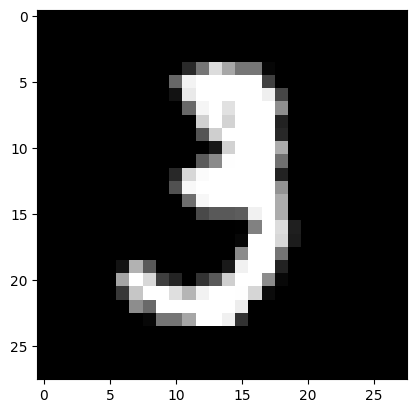

In [ ]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

In [ ]:
train_images = train_data.reshape((-1, 784))
test_images = test_data.reshape((-1, 784))

In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
model = Sequential()
model.add(Dense(units = 128, use_bias=True, input_shape=(784,), activation = "relu"))
model.add(Dense(units = 10, use_bias=True, activation = "softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 50

h = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 8s 6ms/step - loss: 0.3975 - accuracy: 0.8902 - val_loss: 0.2139 - val_accuracy: 0.9442
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1875 - accuracy: 0.9478 - val_loss: 0.1632 - val_accuracy: 0.9531
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1361 - accuracy: 0.9614 - val_loss: 0.1257 - val_accuracy: 0.9643
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1049 - accuracy: 0.9700 - val_loss: 0.1147 - val_accuracy: 0.9664
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0839 - accuracy: 0.9762 - val_loss: 0.1024 - val_accuracy: 0.9687
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9803 - val_loss: 0.0964 - val_accuracy: 0.9717
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9838 - val_loss: 0.0918 - val_accuracy: 0.9728
Epoch 

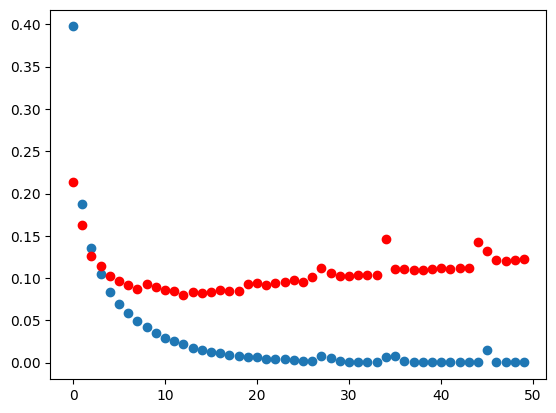

In [ ]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.10705994814634323
Test accuracy: 0.9782999753952026


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 80ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

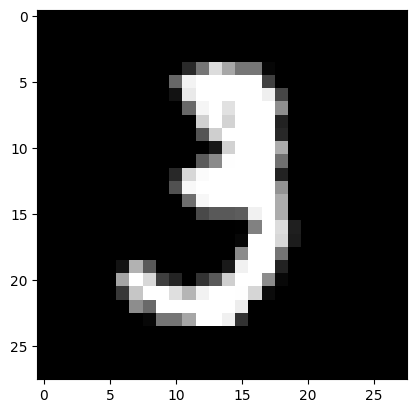

In [ ]:
def plot_image(img_index):
    label_index = train_labels[img_index]
    plt.imshow(train_data[img_index]/255, cmap = 'gray')
    print(label_index)

img_index = 10
plot_image(img_index)

picture = train_data[img_index].reshape(-1,784)

model.predict(picture)

313/313 [==============================] - 1s 2ms/step


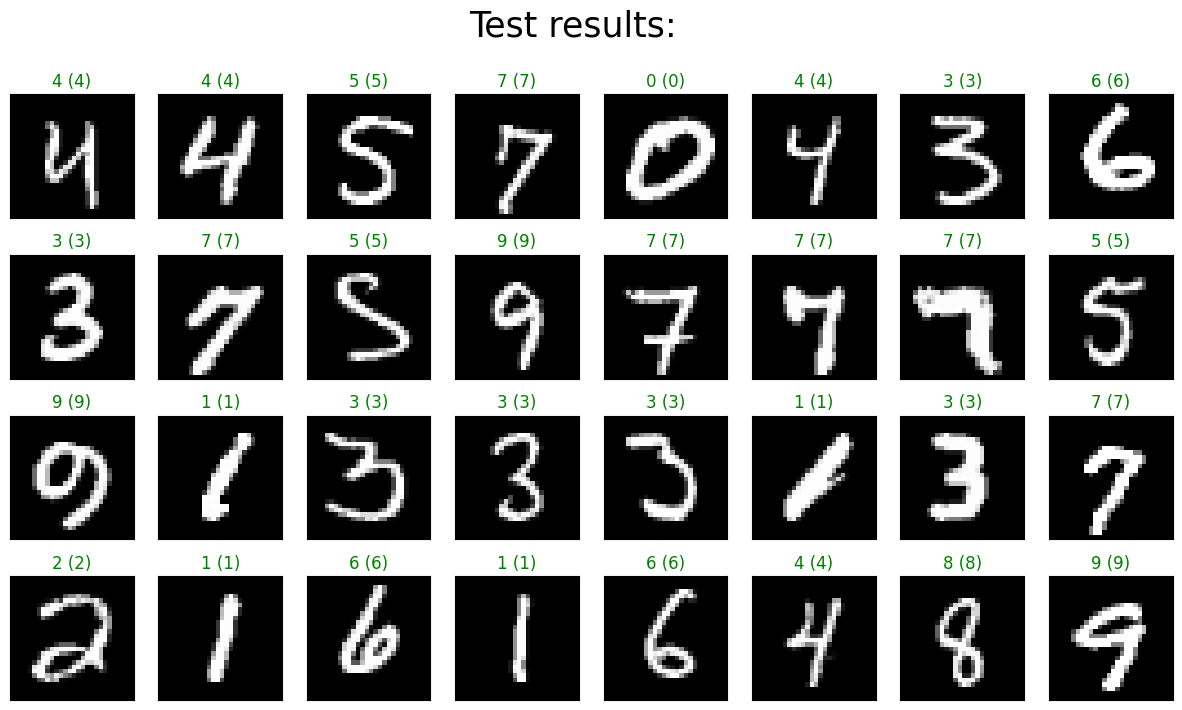

In [ ]:
dataset_labels = ["0","1","2","3","4","5","6","7","8","9"]  # index 9

def visualize_model_predictions(model, x_test, y_test, title_string):
    y_hat = model.predict(x_test)

    # Plot a random sample of 10 test images, their predicted labels and ground truth
    figure = plt.figure(figsize=(15, 8))

    for i, index in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
        ax = figure.add_subplot(4, 8, i + 1, xticks=[], yticks=[])

        # Display each image
        ax.imshow(x_test[index].reshape((28,28)), cmap = 'gray')
        predict_index = np.argmax(y_hat[index])
        true_index = np.argmax(y_test[index])
        # Set the title for each image
        ax.set_title("{} ({})".format(dataset_labels[predict_index],
                                      dataset_labels[true_index]),
                                      color=("green" if predict_index == true_index else "red"))
    figure.suptitle("%s results:" %title_string, fontsize=25)

visualize_model_predictions(model, test_images, test_labels, 'Test')